In [1]:
import pandas as pd
import numpy as np
import xgboost
from sklearn import metrics
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier

from vecstack import stacking
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from sklearn.utils import resample

In [2]:
covid_df = pd.read_csv("dataset.csv")
covid_df.shape

(600, 21)

In [3]:
covid_cols = ['Patient age quantile', 'Hematocrit', 'Hemoglobin',
        'Platelets', 'Red blood Cells', 'Lymphocytes', 'Leukocytes',
        'Basophils', 'Eosinophils', 'Monocytes', 'Serum Glucose', 'Neutrophils',
      'Urea', 'Proteina C reativa mg/dL', 'Creatinine', 'Potassium', 'Sodium',
       'Alanine transaminase', 'Aspartate transaminase','Label']

#covid_df = covid_df[covid_cols]
# print(covid_df)



clinicalOutput = covid_df["Label"]
clinicalInput = covid_df.drop(["Patient ID"],axis=1)
# print(clinicalOutput)
# print(clinicalInput)
clinicalInput.shape

(600, 20)

In [89]:
models = [
    ExtraTreesClassifier(n_estimators=300, max_depth=17),
     
    RandomForestClassifier(n_estimators=300, max_depth=17),
   GradientBoostingClassifier(learning_rate=0.1, n_estimators=290,min_samples_split=200,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10),
   
#     LogisticRegression(solver = 'saga', max_iter= 600, multi_class='ovr',
#                         class_weight='balanced'),
    XGBClassifier(learning_rate=0.4, n_estimators=200, max_depth=17,  eval_metric='error')
]

In [24]:
# configure bootstrap
# n_iterations = 1

# accuracies_stats  = list()
# AUC_stats         = list()
# pre_stats         = list()
# recall_stats      = list()
# f1_stats          = list()
# sensitivity_stats = list()
# specificity_stats = list()
# TP_list = list()
# TN_list = list()
# FP_list = list()
# FN_list = list()

# for i in range(n_iterations):

#     imputer = KNNImputer(n_neighbors=7)
#     Ximputer = imputer.fit_transform(clinicalInput)
#     dataframe=pd.DataFrame(Ximputer, columns=covid_cols)

#     outlier_detect = IsolationForest(n_estimators=150, max_samples=600, contamination=float(0.02), max_features=clinicalInput.shape[1])

#     outlier_detect.fit(dataframe)
#     outliers_predicted = outlier_detect.predict(dataframe)

#     covid_check = dataframe[outlier_detect.predict(dataframe) == -1]

#     dataframe = dataframe[outlier_detect.predict(dataframe) != -1]

# 
#                                save_dir=None,

#                                metric=metrics.accuracy_score,

#                                n_folds=10,

#                                stratified=True,

#                                shuffle=True,

#                                verbose=2)
    
    
#         values = dataframe.values

#     n_size = int(len(dataframe) * 0.80)
# 	# prepare train and test sets
#     data_sample = resample(values, n_samples=n_size)

#     dataframe = pd.DataFrame(data_sample, columns=covid_cols)
# #    print(dataframe)
    
#     # split into input and output elements
#     y = dataframe.Label # Target variable
#     X = dataframe.drop(['Label'], axis = 1) # Features

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#     sm = SMOTE(k_neighbors=11)
#     x_res, y_res = sm.fit_resample(X_train, y_train)
    
    
#     S_train, S_test = stacking(models,
#                                x_res, y_res, X_test,
#                                regression=False,

#                                mode='oof_pred',

#                                needs_proba=False,

#     from sklearn.model_selection import GridSearchCV

#  #取estimator   首先我们从步长(learning rate)和迭代次数(n_estimators)入手。
# #一般来说,开始选择一个较小的步长来网格搜索最好的迭代次数。这里，我们将步长初始值设置为0.1。对于迭代次数进行网格搜索如下：
#     param_test1 = {'n_estimators':range(20,301,10)}
#     gsearch1 = GridSearchCV(estimator =  GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
#                                   min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10),
#                             param_grid = param_test1,scoring='roc_auc', cv=5)
#     gsearch1.fit(x_res, y_res)
#     gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_
#     print(gsearch1.best_params_, gsearch1.best_score_)
    
   
    
  #取对决策树最大深度max_depth和内部节点再划分所需最小样本数min_samples_split进行网格搜索。

#     param_test2 = {'max_depth':range(3,25,2), 'min_samples_split':range(10,801,200)}
#     gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=290, min_samples_leaf=20, 
#                                                                    max_features='sqrt', subsample=0.8, random_state=10), 
#                             param_grid = param_test2, scoring='roc_auc',cv=5)
#     gsearch2.fit(x_res, y_res)
#     gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_  
#     print(gsearch2.best_params_, gsearch2.best_score_)
    
    
    
#     #再对内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf一起调参。
#     param_test3 = {'min_samples_split':range(100,1900,200), 'min_samples_leaf':range(20,101,10)}
#     gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=290,max_depth=11,
#                                      max_features='sqrt', subsample=0.8, random_state=10), 
#                        param_grid = param_test3, scoring='roc_auc', cv=5)
#     gsearch3.fit(x_res, y_res)
#     gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_
#     print(gsearch3.best_params_, gsearch3.best_score_)
    
    
    
    
#     #再对最大特征数max_features进行网格搜索。
#     param_test4 = {'max_features':range(7,20,2)}
#     gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=290,max_depth=11, min_samples_leaf =30, 
#                min_samples_split =100, subsample=0.8, random_state=10), 
#                        param_grid = param_test4, scoring='roc_auc', cv=5)
#     gsearch4.fit(x_res, y_res)
#     gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_
#     print(gsearch4.best_params_, gsearch4.best_score_)
    
    
#     #再对子采样的比例进行网格搜索：
#     param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,1.0]}
#     gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=290,max_depth=11, min_samples_leaf =30, 
#                min_samples_split =100, max_features=11, random_state=10), 
#                        param_grid = param_test5, scoring='roc_auc', cv=5)
#     gsearch5.fit(x_res, y_res)
#     gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_
#     print(gsearch5.best_params_, gsearch5.best_score_)
    
    
#     param_test1 = {'n_estimators':range(20,301,10)}
#     gsearch1 = GridSearchCV(estimator =  ExtraTreesClassifier(),
#                             param_grid = param_test1,scoring='roc_auc', cv=5)
#     gsearch1.fit(x_res, y_res)
#     gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_
#     print(gsearch1.best_params_, gsearch1.best_score_)
    
    
#     param_test2 = {'max_depth':range(3,25,2)}
#     gsearch2 = GridSearchCV(estimator = ExtraTreesClassifier(n_estimators=300), 
#                             param_grid = param_test2, scoring='roc_auc',cv=5)
#     gsearch2.fit(x_res, y_res)
#     gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_  
#     print(gsearch2.best_params_, gsearch2.best_score_)
    
#     param_test1 = {'n_estimators':range(20,301,10)}
#     gsearch1 = GridSearchCV(estimator =  XGBClassifier(),
#                             param_grid = param_test1,scoring='roc_auc', cv=5)
#     gsearch1.fit(x_res, y_res)
#     gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_
#     print(gsearch1.best_params_, gsearch1.best_score_)
    
    
#     param_test2 = {'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0]}
#     gsearch2 = GridSearchCV(estimator = XGBClassifier(n_estimators=80), 
#                             param_grid = param_test2, scoring='roc_auc',cv=5)
#     gsearch2.fit(x_res, y_res)
#     gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_  
#     print(gsearch2.best_params_, gsearch2.best_score_)
    
    
#     param_test3 = {'max_depth':range(3,25,2)}
#     gsearch3 = GridSearchCV(estimator = XGBClassifier(n_estimators=80,learning_rate=0.75), 
#                             param_grid = param_test3, scoring='roc_auc',cv=5)
#     gsearch3.fit(x_res, y_res)
#     gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_  
#     print(gsearch3.best_params_, gsearch3.best_score_)
      
#     model = XGBClassifier(learning_rate=1.0,
#                           n_estimators=300, max_depth=17)



#     model = LogisticRegression(solver = 'saga', max_iter= 450, multi_class='ovr',
#                         class_weight='balanced')
    
    
    
#      from sklearn.svm import SVC
#     model = SVC(probability=True,kernel='rbf', degree=2,gamma=0.1,random_state=2,decision_function_shape="ovo")
    
    
    
    
    
    
#     from sklearn.svm import SVC
#     param_test1 = {'degree':range(0,10,1)}
#     gsearch1 = GridSearchCV(estimator =  SVC(probability=True,kernel='rbf',decision_function_shape="ovr"),
#                             param_grid = param_test1,scoring='roc_auc', cv=5)
#     gsearch1.fit(S_train, y_res)
#     gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_
#     print(gsearch1.best_params_, gsearch1.best_score_)
    
    
#     param_test2 = {'gamma':[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0]}
#     gsearch2 = GridSearchCV(estimator = SVC(probability=True,kernel='rbf',degree=0,decision_function_shape="ovr"), 
#                             param_grid = param_test2, scoring='roc_auc',cv=5)
#     gsearch2.fit(x_res, y_res)
#     gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_  
#     print(gsearch2.best_params_, gsearch2.best_score_)
    
    
#     param_test3 = {'max_depth':range(3,25,2)}
#     gsearch3 = GridSearchCV(estimator = SVC(probability=True,kernel='rbf',degree=0,gamma=1.0,decision_function_shape="ovr"), 
#                             param_grid = param_test3, scoring='roc_auc',cv=5)
#     gsearch3.fit(x_res, y_res)
#     gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_  
#     print(gsearch3.best_params_, gsearch3.best_score_)
    
#     param_test1 = {'max_iter':range(10,500,10)}
#     gsearch1 = GridSearchCV(estimator = LogisticRegression(solver = 'saga', multi_class='ovr',
#                         class_weight='balanced'),
#                             param_grid = param_test1,scoring='roc_auc', cv=5)
#     gsearch1.fit(S_train, y_res)
#     gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_
#     print(gsearch1.best_params_, gsearch1.best_score_)
        
    
    
    
    
    
    
    

#     # fit model
#     model = model.fit(S_train, y_res)

	# evaluate model
#     y_pred = model.predict(S_test)
#     score = metrics.accuracy_score(y_test, y_pred)

#     accuracies_stats.append(score)

#     probs = model.predict_proba(S_test)
#     probs = probs[:, 1]
#     AUC_stats.append(metrics.roc_auc_score(y_test, probs))

#     pre_stats.append(metrics.precision_score(y_test, y_pred, average='binary'))
#     recall_stats.append(metrics.recall_score(y_test, y_pred, average='binary'))
#     f1_stats.append(metrics.f1_score(y_test, y_pred, average='binary'))

#     confusion = metrics.confusion_matrix(y_test, y_pred)

#     TP = confusion[1, 1]
#     TN = confusion[0, 0]
#     FP = confusion[0, 1]
#     FN = confusion[1, 0]

#     # recall of the positive
#     sensitivity = TP / float(FN + TP)

#     # recall of the negative class
#     specificity = TN / (TN + FP)

#     sensitivity_stats.append(sensitivity)
#     specificity_stats.append(specificity)

#     TP_list.append(TP)
#     TN_list.append(TN)
#     FP_list.append(FP)
#     FN_list.append(FN)
    
# #     param_test1 = {'n_estimators':range(20,301,10)}
# #     gsearch1 = GridSearchCV(estimator =  RandomForestClassifier(),
# #                             param_grid = param_test1,scoring='roc_auc', cv=5)
# #     gsearch1.fit(x_res, y_res)
# #     gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_
# #     print(gsearch1.best_params_, gsearch1.best_score_)
    
    
# #     param_test2 = {'max_depth':range(3,25,2)}
# #     gsearch2 = GridSearchCV(estimator = RandomForestClassifier(), 
# #                             param_grid = param_test2, scoring='roc_auc',cv=5)
# #     gsearch2.fit(x_res, y_res)
# #     gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_  
# #     print(gsearch2.best_params_, gsearch2.best_score_)
    


In [96]:
models = [
    ExtraTreesClassifier(n_estimators=300, max_depth=17),
     
       
    RandomForestClassifier(n_estimators=90, max_depth=19),
   GradientBoostingClassifier(learning_rate=0.1, n_estimators=290,max_depth=11, min_samples_leaf =30, 
               min_samples_split =100, max_features=11, random_state=10,subsample=0.85),
    
    
    
    
  
   
#     LogisticRegression(solver = 'saga', max_iter= 600, multi_class='ovr',
#                         class_weight='balanced'),
    XGBClassifier(learning_rate=0.4, n_estimators=200, max_depth=17,  eval_metric='error')
#     XGBClassifier
#     #(learning_rate=0.4, n_estimators=200, max_depth=20,  eval_metric='error')
#     (learning_rate=0.4, n_estimators=200, max_depth=20,  eval_metric='error')
]

In [97]:
# configure bootstrap
n_iterations = 1

accuracies_stats  = list()
AUC_stats         = list()
pre_stats         = list()
recall_stats      = list()
f1_stats          = list()
sensitivity_stats = list()
specificity_stats = list()
TP_list = list()
TN_list = list()
FP_list = list()
FN_list = list()

for i in range(n_iterations):

    imputer = KNNImputer(n_neighbors=7)
    Ximputer = imputer.fit_transform(clinicalInput)
    dataframe=pd.DataFrame(Ximputer, columns=covid_cols)

    outlier_detect = IsolationForest(n_estimators=150, max_samples=600, contamination=float(0.02), max_features=clinicalInput.shape[1])

    dataframe = dataframe.values
    outlier_detect.fit(dataframe)


    outliers_predicted = outlier_detect.predict(dataframe)
    covid_check = dataframe[outlier_detect.predict(dataframe) == -1]
    dataframe = dataframe[outlier_detect.predict(dataframe) != -1]

     #values = dataframe.values
    n_size = int(len(dataframe) * 0.80)

    # prepare train and test sets
    #data_sample = resample(values, n_samples=n_size)
    data_sample = resample(dataframe, n_samples=n_size)


    dataframe = pd.DataFrame(data_sample, columns=covid_cols)
#    print(dataframe)
    
    # split into input and output elements
    y = dataframe.Label # Target variable
    X = dataframe.drop(['Label'], axis = 1) # Features

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    sm = SMOTE(k_neighbors=13)
    x_res, y_res = sm.fit_resample(X_train, y_train)
    
#     XGBRegressor_bagging_model = BaggingRegressor(models,
#                                               n_estimators=100,                                              
#                                               max_samples=1.0, 
#                                               max_features=1.0, 
#                                               bootstrap=True,
#                                               oob_score=True, 
#                                               warm_start=False,
#                                               n_jobs=-1,
#                                               verbose=0)
    

    S_train, S_test = stacking(models,
                               x_res, y_res, X_test,
                               regression=False,

                               mode='oof_pred',

                               needs_proba=False,

                               save_dir=None,

                               metric=metrics.accuracy_score,

                               n_folds=10,

                               stratified=True,

                               shuffle=True,

                               verbose=2)

#     model = XGBClassifier(learning_rate=1.0,
#                           n_estimators=300, max_depth=17)



#     model = LogisticRegression(solver = 'saga', max_iter= 10, multi_class='ovr',
#                         class_weight='balanced')
    
    
    
    from sklearn.svm import SVC
    model = SVC(probability=True)   
    

    # fit model
    model = model.fit(S_train, y_res)

	# evaluate model
    y_pred = model.predict(S_test)
    score = metrics.accuracy_score(y_test, y_pred)

    accuracies_stats.append(score)

    probs = model.predict_proba(S_test)
    probs = probs[:, 1]
    AUC_stats.append(metrics.roc_auc_score(y_test, probs))

    pre_stats.append(metrics.precision_score(y_test, y_pred, average='binary'))
    recall_stats.append(metrics.recall_score(y_test, y_pred, average='binary'))
    f1_stats.append(metrics.f1_score(y_test, y_pred, average='binary'))

    confusion = metrics.confusion_matrix(y_test, y_pred)

    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    # recall of the positive
    sensitivity = TP / float(FN + TP)

    # recall of the negative class
    specificity = TN / (TN + FP)

    sensitivity_stats.append(sensitivity)
    specificity_stats.append(specificity)

    TP_list.append(TP)
    TN_list.append(TN)
    FP_list.append(FP)
    FN_list.append(FN)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred]
n_models:     [4]

model  0:     [ExtraTreesClassifier]
    fold  0:  [0.98529412]
    fold  1:  [0.98529412]
    fold  2:  [0.97058824]
    fold  3:  [1.00000000]
    fold  4:  [1.00000000]
    fold  5:  [0.95588235]
    fold  6:  [0.98507463]
    fold  7:  [1.00000000]
    fold  8:  [0.98507463]
    fold  9:  [0.98507463]
    ----
    MEAN:     [0.98522827] + [0.01315373]
    FULL:     [0.98520710]

    Fitting on full train set...

model  1:     [RandomForestClassifier]
    fold  0:  [0.98529412]
    fold  1:  [0.95588235]
    fold  2:  [0.97058824]
    fold  3:  [0.97058824]
    fold  4:  [0.98529412]
    fold  5:  [0.92647059]
    fold  6:  [0.98507463]
    fold  7:  [0.98507463]
    fold  8:  [0.98507463]
    fold  9:  [0.97014925]
    ----
    MEAN:     [0.97194908] + [0.01790641]
    FULL:     [0.97189349]

    Fitting on full train set...

model  2:     [GradientBoostingCla

In [98]:
print("Average TP  = {}".format(np.round(np.array(TP_list).mean(), 4)))
print("Average TN  = {}".format(np.round(np.array(TN_list).mean(), 4)))
print("Average FP  = {}".format(np.round(np.array(FP_list).mean(), 4)))
print("Average FN  = {}".format(np.round(np.array(FN_list).mean(), 4)))

# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(accuracies_stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(accuracies_stats, p))

print("Average accuracy  = {}".format(np.round(np.array(accuracies_stats).mean(), 4)))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))


p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(AUC_stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(AUC_stats, p))

print("Average AUC       = {}".format(np.round(np.array(AUC_stats).mean(), 4)))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(pre_stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(pre_stats, p))
print("Average precision = {}".format(np.round(np.array(pre_stats).mean(), 4)))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(recall_stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(recall_stats, p))
print("Average recall    = {}".format(np.round(np.array(recall_stats).mean(), 4)))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(f1_stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(f1_stats, p))
print("Average f1 score = {}".format(np.round(np.array(f1_stats).mean(), 4)))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(sensitivity_stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(sensitivity_stats, p))
print("Sensitivity score = {}".format(np.round(np.array(sensitivity_stats).mean(), 4)))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(specificity_stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(specificity_stats, p))
print("Specificity score = {}".format(np.round(np.array(specificity_stats).mean(), 4)))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))


Average TP  = 9.0
Average TN  = 83.0
Average FP  = 2.0
Average FN  = 0.0
Average accuracy  = 0.9787
95.0 confidence interval 97.9% and 97.9%
Average AUC       = 0.9869
95.0 confidence interval 98.7% and 98.7%
Average precision = 0.8182
95.0 confidence interval 81.8% and 81.8%
Average recall    = 1.0
95.0 confidence interval 100.0% and 100.0%
Average f1 score = 0.9
95.0 confidence interval 90.0% and 90.0%
Sensitivity score = 1.0
95.0 confidence interval 100.0% and 100.0%
Specificity score = 0.9765
95.0 confidence interval 97.6% and 97.6%


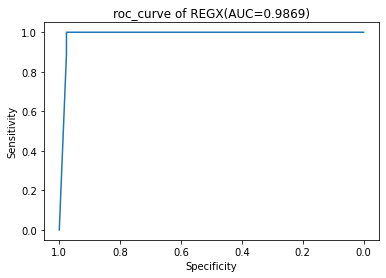

In [100]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, probs)  # 计算auc
fpr, tpr, threasholds = roc_curve(y_test, probs)  # 计算ROC的值
plt.title("roc_curve of %s(AUC=%.4f)" % ('REGX', auc))
plt.xlabel('Specificity')  # specificity = 1 - np.array(gbm_fpr))
plt.ylabel('Sensitivity')  # sensitivity = gbm_tpr
plt.plot(list(1 - np.array(fpr)), tpr)
plt.gca().invert_xaxis()  # 将X轴反转

# 保存图片并指定分辨率
dpi = 300  # 设置分辨率为300
save_path = "roc_curve1111.png"  # 保存路径及文件名
plt.savefig(save_path, dpi=dpi)

# 显示图片
plt.show()
plt.show()

import seaborn as sn
from sklearn.metrics import plot_confusion_matrix
# 得到混淆矩阵
# cm = confusion_matrix(y_test, probs, labels=[0, 1])
#
# # cm
# # # 转换成dataframe，转不转一样
# df_cm = pd.DataFrame(cm)
# df_cm
# # annot = True 显示数字 ，fmt参数不使用科学计数法进行显示
# ax = sn.heatmap(df_cm, annot=True, fmt='.20g')
# ax.set_title('confusion matrix')  # 标题
# ax.set_xlabel('predict')  # x轴
# ax.set_ylabel('true')  # y轴
# plt.show()

# plot_confusion_matrix(model, X_test, y_test)
# plt.show()

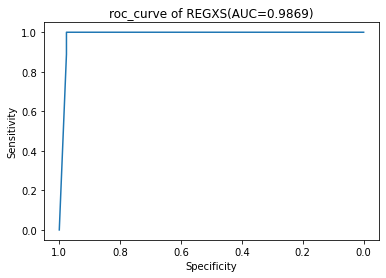

In [101]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, probs)  # 计算auc
fpr, tpr, threasholds = roc_curve(y_test, probs)  # 计算ROC的值
plt.title("roc_curve of %s(AUC=%.4f)" % ('REGXS', auc))
plt.xlabel('Specificity')  # specificity = 1 - np.array(gbm_fpr))
plt.ylabel('Sensitivity')  # sensitivity = gbm_tpr
plt.plot(list(1 - np.array(fpr)), tpr)
plt.gca().invert_xaxis()  # 将X轴反转
plt.show()

import seaborn as sn
from sklearn.metrics import plot_confusion_matrix
# 得到混淆矩阵
# cm = confusion_matrix(y_test, probs, labels=[0, 1])
#
# # cm
# # # 转换成dataframe，转不转一样
# df_cm = pd.DataFrame(cm)
# df_cm
# # annot = True 显示数字 ，fmt参数不使用科学计数法进行显示
# ax = sn.heatmap(df_cm, annot=True, fmt='.20g')
# ax.set_title('confusion matrix')  # 标题
# ax.set_xlabel('predict')  # x轴
# ax.set_ylabel('true')  # y轴
# plt.show()

# plot_confusion_matrix(model, X_test, y_test)
# plt.show()

[[76  3]
 [ 5 10]]


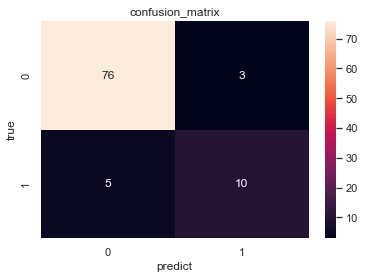

In [106]:
import seaborn as sns
sns.set()


f, ax = plt.subplots()
print(confusion) # 打印出来看看
sns.heatmap(confusion, annot=True, ax=ax) # 画热力图
ax.set_title('confusion_matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 
# 保存图片并指定分辨率
dpi = 300  # 设置分辨率为300
save_path = "roc_curve.png"  # 保存路径及文件名
plt.savefig(save_path, dpi=dpi)

# 显示图片
plt.show()